# Problem Description

Users of e-commerce websites are not able to identify the brands of their luxury handbags at a glance due to the vast designs produced by each brand. An image classifier implemented  This is a multi-class classification problem, meaning that there are more than two classes to predict. In this project, we are trying to predict 5 different handbag brands. 

In [1]:
import os,cv2
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix


import keras
from keras import backend as K
from keras import optimizers,applications
from keras.engine.topology import Input
from keras.utils import to_categorical, np_utils
from keras.models import load_model
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


Using TensorFlow backend.


# Stage 1: Web-scraping dataset

### What sort of handbag images are we scraping?
- Selenium is used to open/close the browser and input the search item
- BeautifulSoup helps the code sparse through the html script
- urrlib request help put the images into a folder

### Import packages for scraping:
- Selenium is used to open/close the browser and input the search item
- BeautifulSoup helps the code sparse through the html script
- urrlib request help put the images into a folder

In [ ]:
from bs4 import BeautifulSoup
import urllib
from urllib import request
import re
import csv
import os.path
import time
import datetime
import codecs
import urllib.request
import shutil
import PyPDF2
import random
from selenium import webdriver
import xlrd

from contextlib import closing
from selenium.webdriver import Firefox # pip install selenium
from selenium.webdriver.support.ui import WebDriverWait

import http.client
import pandas as pd

We must generate the links for each handbag brand that we intend to scrap off google images. 

In [ ]:
bags=pd.read_csv("./bag.csv")
handbagnames=bags.values.T.tolist()[0]
typeofbags=bags.values.T.tolist()[1]
url=[]

for handbag in handbagnames:
    url += ["https://www.google.com/search?q=handbag%20"+handbag+"&source=lnms&tbm=isch"]
#     for kind in typeofbags:
#         url += ["https://www.google.com/search?q=handbag%20"+handbag+kind+"&source=lnms&tbm=isc/h"]

# Stage 2: Pre-processing 

Building powerful image classification models using very little data
from blog.keras.io.
In our setup, we:
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created Gucci/, Celine/, Chanel/, Givenchy/ and Hermes/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 12500-13499 in data/train/dogs
- put the dog pictures index 13500-13900 in data/validation/dogs
So that we have 1000 training examples for each class, and 400 validation examples for each class.
In summary, this is our directory structure:'''


In [2]:
# For the ease of processing, we make it in 128 by 128
# dimensions of our images.
img_width, img_height = 128,128

train_data_dir = 'Data/train'
validation_data_dir = 'Data/validation'
nb_train_samples = 7500
nb_validation_samples = 1500
epochs = 200
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# Stage 1.5: Image Generation and labelling



In [3]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [4]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 7500 images belonging to 5 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1500 images belonging to 5 classes.


# Stage 2: Keras Model-first training


In [11]:
num_classes = 5
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

/home/hayatibintehamzah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """
/home/hayatibintehamzah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


In [12]:
# Viewing model_configuration

model.summary()
# model.get_config()
# model.layers[0].get_config()
# model.layers[0].input_shape			
# model.layers[0].output_shape			
# model.layers[0].get_weights()
# np.shape(model.layers[0].get_weights()[0])
# model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 124, 124, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 60, 60, 64)        0         
__________

In [9]:
# Training with callbacks
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]


# Training
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,callbacks=callbacks_list)

Epoch 1/500
467/468 [============================>.] - ETA: 0s - loss: 1.5228 - acc: 0.3127
Epoch 00001: val_loss improved from inf to 1.21936, saving model to Best-weights-my_model-001-1.5223-0.3133.hdf5
468/468 [==============================] - 32s 69ms/step - loss: 1.5223 - acc: 0.3132 - val_loss: 1.2194 - val_acc: 0.5195
Epoch 2/500
467/468 [============================>.] - ETA: 0s - loss: 1.2812 - acc: 0.4847
Epoch 00002: val_loss improved from 1.21936 to 1.02629, saving model to Best-weights-my_model-002-1.2805-0.4853.hdf5
468/468 [==============================] - 32s 68ms/step - loss: 1.2806 - acc: 0.4853 - val_loss: 1.0263 - val_acc: 0.6294
Epoch 3/500
467/468 [============================>.] - ETA: 0s - loss: 1.1573 - acc: 0.5527
Epoch 00003: val_loss improved from 1.02629 to 0.89997, saving model to Best-weights-my_model-003-1.1572-0.5525.hdf5
468/468 [==============================] - 32s 67ms/step - loss: 1.1573 - acc: 0.5525 - val_loss: 0.9000 - val_acc: 0.6920
Epoch 4/

Epoch 27/500
467/468 [============================>.] - ETA: 0s - loss: 0.4388 - acc: 0.8423
Epoch 00027: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.4383 - acc: 0.8425 - val_loss: 0.1414 - val_acc: 0.9589
Epoch 28/500
467/468 [============================>.] - ETA: 0s - loss: 0.4222 - acc: 0.8460
Epoch 00028: val_loss improved from 0.12986 to 0.12520, saving model to Best-weights-my_model-028-0.4221-0.8458.hdf5
468/468 [==============================] - 31s 67ms/step - loss: 0.4222 - acc: 0.8458 - val_loss: 0.1252 - val_acc: 0.9623
Epoch 29/500
467/468 [============================>.] - ETA: 0s - loss: 0.4156 - acc: 0.8503
Epoch 00029: val_loss improved from 0.12520 to 0.11270, saving model to Best-weights-my_model-029-0.4155-0.8503.hdf5
468/468 [==============================] - 31s 67ms/step - loss: 0.4155 - acc: 0.8503 - val_loss: 0.1127 - val_acc: 0.9737
Epoch 30/500
467/468 [============================>.] - ETA: 0s - loss: 0.4097 -

Epoch 56/500
467/468 [============================>.] - ETA: 0s - loss: 0.2958 - acc: 0.8939
Epoch 00056: val_loss improved from 0.04492 to 0.03946, saving model to Best-weights-my_model-056-0.2965-0.8936.hdf5
468/468 [==============================] - 32s 68ms/step - loss: 0.2966 - acc: 0.8935 - val_loss: 0.0395 - val_acc: 0.9912
Epoch 57/500
467/468 [============================>.] - ETA: 0s - loss: 0.2874 - acc: 0.9023
Epoch 00057: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.2875 - acc: 0.9022 - val_loss: 0.0605 - val_acc: 0.9885
Epoch 58/500
467/468 [============================>.] - ETA: 0s - loss: 0.2904 - acc: 0.8907
Epoch 00058: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.2902 - acc: 0.8906 - val_loss: 0.0564 - val_acc: 0.9805
Epoch 59/500
467/468 [============================>.] - ETA: 0s - loss: 0.2900 - acc: 0.8949
Epoch 00059: val_loss did not improve
468/468 [===================

Epoch 87/500
467/468 [============================>.] - ETA: 0s - loss: 0.2430 - acc: 0.9127
Epoch 00087: val_loss improved from 0.02428 to 0.02385, saving model to Best-weights-my_model-087-0.2433-0.9125.hdf5
468/468 [==============================] - 31s 67ms/step - loss: 0.2432 - acc: 0.9125 - val_loss: 0.0239 - val_acc: 0.9946
Epoch 88/500
467/468 [============================>.] - ETA: 0s - loss: 0.2376 - acc: 0.9151
Epoch 00088: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.2378 - acc: 0.9149 - val_loss: 0.0307 - val_acc: 0.9919
Epoch 89/500
467/468 [============================>.] - ETA: 0s - loss: 0.2438 - acc: 0.9151
Epoch 00089: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.2435 - acc: 0.9152 - val_loss: 0.0320 - val_acc: 0.9899
Epoch 90/500
467/468 [============================>.] - ETA: 0s - loss: 0.2388 - acc: 0.9138
Epoch 00090: val_loss did not improve
468/468 [===================

Epoch 118/500
467/468 [============================>.] - ETA: 0s - loss: 0.2122 - acc: 0.9260
Epoch 00118: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.2127 - acc: 0.9258 - val_loss: 0.0221 - val_acc: 0.9953
Epoch 119/500
467/468 [============================>.] - ETA: 0s - loss: 0.2098 - acc: 0.9285
Epoch 00119: val_loss did not improve
468/468 [==============================] - 31s 66ms/step - loss: 0.2097 - acc: 0.9286 - val_loss: 0.0260 - val_acc: 0.9973
Epoch 120/500
467/468 [============================>.] - ETA: 0s - loss: 0.2294 - acc: 0.9211
Epoch 00120: val_loss did not improve
468/468 [==============================] - 31s 66ms/step - loss: 0.2292 - acc: 0.9212 - val_loss: 0.0254 - val_acc: 0.9919
Epoch 121/500
467/468 [============================>.] - ETA: 0s - loss: 0.2250 - acc: 0.9181
Epoch 00121: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.2253 - acc: 0.9179 - val_loss: 0.026

Epoch 149/500
467/468 [============================>.] - ETA: 0s - loss: 0.2068 - acc: 0.9291- E
Epoch 00149: val_loss did not improve
468/468 [==============================] - 31s 66ms/step - loss: 0.2067 - acc: 0.9290 - val_loss: 0.0135 - val_acc: 0.9966
Epoch 150/500
467/468 [============================>.] - ETA: 0s - loss: 0.1921 - acc: 0.9303
Epoch 00150: val_loss did not improve
468/468 [==============================] - 33s 71ms/step - loss: 0.1917 - acc: 0.9305 - val_loss: 0.0128 - val_acc: 0.9966
Epoch 151/500
467/468 [============================>.] - ETA: 0s - loss: 0.2062 - acc: 0.9295
Epoch 00151: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.2058 - acc: 0.9297 - val_loss: 0.0182 - val_acc: 0.9973
Epoch 152/500
467/468 [============================>.] - ETA: 0s - loss: 0.2079 - acc: 0.9275
Epoch 00152: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.2081 - acc: 0.9274 - val_loss: 0.

Epoch 181/500
467/468 [============================>.] - ETA: 0s - loss: 0.1956 - acc: 0.9286
Epoch 00181: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.1955 - acc: 0.9286 - val_loss: 0.0170 - val_acc: 0.9966
Epoch 182/500
467/468 [============================>.] - ETA: 0s - loss: 0.1833 - acc: 0.9406
Epoch 00182: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.1832 - acc: 0.9407 - val_loss: 0.0171 - val_acc: 0.9980
Epoch 183/500
467/468 [============================>.] - ETA: 0s - loss: 0.2028 - acc: 0.9291
Epoch 00183: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.2027 - acc: 0.9291 - val_loss: 0.0098 - val_acc: 0.9980
Epoch 184/500
467/468 [============================>.] - ETA: 0s - loss: 0.1893 - acc: 0.9329
Epoch 00184: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.1889 - acc: 0.9331 - val_loss: 0.012

Epoch 213/500
467/468 [============================>.] - ETA: 0s - loss: 0.1841 - acc: 0.9400
Epoch 00213: val_loss did not improve
468/468 [==============================] - 32s 67ms/step - loss: 0.1840 - acc: 0.9400 - val_loss: 0.0113 - val_acc: 0.9953
Epoch 214/500
467/468 [============================>.] - ETA: 0s - loss: 0.1830 - acc: 0.9351
Epoch 00214: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.1831 - acc: 0.9350 - val_loss: 0.0120 - val_acc: 0.9953
Epoch 215/500
467/468 [============================>.] - ETA: 0s - loss: 0.1657 - acc: 0.9423
Epoch 00215: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.1680 - acc: 0.9420 - val_loss: 0.0118 - val_acc: 0.9966
Epoch 216/500
467/468 [============================>.] - ETA: 0s - loss: 0.1910 - acc: 0.9327
Epoch 00216: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.1906 - acc: 0.9328 - val_loss: 0.010

467/468 [============================>.] - ETA: 0s - loss: 0.1645 - acc: 0.9441
Epoch 00245: val_loss did not improve
468/468 [==============================] - 32s 67ms/step - loss: 0.1643 - acc: 0.9440 - val_loss: 0.0123 - val_acc: 0.9953
Epoch 246/500
467/468 [============================>.] - ETA: 0s - loss: 0.1805 - acc: 0.9392
Epoch 00246: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.1812 - acc: 0.9389 - val_loss: 0.0162 - val_acc: 0.9939
Epoch 247/500
467/468 [============================>.] - ETA: 0s - loss: 0.1684 - acc: 0.9404
Epoch 00247: val_loss did not improve
468/468 [==============================] - 32s 67ms/step - loss: 0.1690 - acc: 0.9403 - val_loss: 0.0091 - val_acc: 0.9966
Epoch 248/500
467/468 [============================>.] - ETA: 0s - loss: 0.1971 - acc: 0.9331- ETA: 0s - loss: 0.1975 -
Epoch 00248: val_loss did not improve
468/468 [==============================] - 32s 67ms/step - loss: 0.1986 - acc: 0.9326 - val

Epoch 277/500
467/468 [============================>.] - ETA: 0s - loss: 0.1607 - acc: 0.9434
Epoch 00277: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.1607 - acc: 0.9432 - val_loss: 0.0080 - val_acc: 0.9980
Epoch 278/500
467/468 [============================>.] - ETA: 0s - loss: 0.1809 - acc: 0.9386
Epoch 00278: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.1820 - acc: 0.9386 - val_loss: 0.0095 - val_acc: 0.9973
Epoch 279/500
467/468 [============================>.] - ETA: 0s - loss: 0.1883 - acc: 0.9375
Epoch 00279: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.1880 - acc: 0.9377 - val_loss: 0.0145 - val_acc: 0.9973
Epoch 280/500
467/468 [============================>.] - ETA: 0s - loss: 0.1693 - acc: 0.9406
Epoch 00280: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.1695 - acc: 0.9404 - val_loss: 0.010

Epoch 309/500
467/468 [============================>.] - ETA: 0s - loss: 0.1836 - acc: 0.9371
Epoch 00309: val_loss did not improve
468/468 [==============================] - 32s 67ms/step - loss: 0.1834 - acc: 0.9372 - val_loss: 0.0119 - val_acc: 0.9993
Epoch 310/500
467/468 [============================>.] - ETA: 0s - loss: 0.2077 - acc: 0.9305
Epoch 00310: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.2074 - acc: 0.9306 - val_loss: 0.0166 - val_acc: 0.9953
Epoch 311/500
467/468 [============================>.] - ETA: 0s - loss: 0.1494 - acc: 0.9491
Epoch 00311: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.1493 - acc: 0.9491 - val_loss: 0.0121 - val_acc: 0.9960
Epoch 312/500
467/468 [============================>.] - ETA: 0s - loss: 0.1604 - acc: 0.9461
Epoch 00312: val_loss did not improve
468/468 [==============================] - 32s 67ms/step - loss: 0.1604 - acc: 0.9460 - val_loss: 0.006

Epoch 341/500
467/468 [============================>.] - ETA: 0s - loss: 0.1759 - acc: 0.9424- ETA: 4
Epoch 00341: val_loss did not improve
468/468 [==============================] - 32s 69ms/step - loss: 0.1755 - acc: 0.9425 - val_loss: 0.0079 - val_acc: 0.9973
Epoch 342/500
467/468 [============================>.] - ETA: 0s - loss: 0.1556 - acc: 0.9480
Epoch 00342: val_loss did not improve
468/468 [==============================] - 32s 69ms/step - loss: 0.1556 - acc: 0.9480 - val_loss: 0.0088 - val_acc: 0.9993
Epoch 343/500
467/468 [============================>.] - ETA: 0s - loss: 0.1603 - acc: 0.9435
Epoch 00343: val_loss improved from 0.00375 to 0.00320, saving model to Best-weights-my_model-343-0.1610-0.9435.hdf5
468/468 [==============================] - 32s 69ms/step - loss: 0.1609 - acc: 0.9435 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 344/500
467/468 [============================>.] - ETA: 0s - loss: 0.1585 - acc: 0.9469
Epoch 00344: val_loss did not improve
468/468 [=======

Epoch 373/500
467/468 [============================>.] - ETA: 0s - loss: 0.1751 - acc: 0.9423
Epoch 00373: val_loss did not improve
468/468 [==============================] - 32s 67ms/step - loss: 0.1747 - acc: 0.9424 - val_loss: 0.0048 - val_acc: 0.9980
Epoch 374/500
467/468 [============================>.] - ETA: 0s - loss: 0.1591 - acc: 0.9500
Epoch 00374: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.1593 - acc: 0.9498 - val_loss: 0.0083 - val_acc: 0.9980
Epoch 375/500
467/468 [============================>.] - ETA: 0s - loss: 0.1581 - acc: 0.9474
Epoch 00375: val_loss did not improve
468/468 [==============================] - 32s 69ms/step - loss: 0.1587 - acc: 0.9471 - val_loss: 0.0085 - val_acc: 0.9980
Epoch 376/500
467/468 [============================>.] - ETA: 0s - loss: 0.1685 - acc: 0.9454
Epoch 00376: val_loss did not improve
468/468 [==============================] - 32s 67ms/step - loss: 0.1686 - acc: 0.9454 - val_loss: 0.010

Epoch 405/500
467/468 [============================>.] - ETA: 0s - loss: 0.1778 - acc: 0.9403
Epoch 00405: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.1775 - acc: 0.9404 - val_loss: 0.0063 - val_acc: 0.9987
Epoch 406/500
467/468 [============================>.] - ETA: 0s - loss: 0.1582 - acc: 0.9499
Epoch 00406: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.1579 - acc: 0.9501 - val_loss: 0.0067 - val_acc: 0.9993
Epoch 407/500
467/468 [============================>.] - ETA: 0s - loss: 0.1585 - acc: 0.9445
Epoch 00407: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.1584 - acc: 0.9444 - val_loss: 0.0062 - val_acc: 0.9966
Epoch 408/500
467/468 [============================>.] - ETA: 0s - loss: 0.1522 - acc: 0.9459- ETA: 1s - los
Epoch 00408: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.1519 - acc: 0.9460 - 

Epoch 437/500
467/468 [============================>.] - ETA: 0s - loss: 0.1635 - acc: 0.9478
Epoch 00437: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.1632 - acc: 0.9479 - val_loss: 0.0131 - val_acc: 0.9966
Epoch 438/500
467/468 [============================>.] - ETA: 0s - loss: 0.1739 - acc: 0.9448
Epoch 00438: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.1737 - acc: 0.9449 - val_loss: 0.0072 - val_acc: 0.9980
Epoch 439/500
467/468 [============================>.] - ETA: 0s - loss: 0.1835 - acc: 0.9392
Epoch 00439: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.1833 - acc: 0.9394 - val_loss: 0.0179 - val_acc: 0.9966
Epoch 440/500
467/468 [============================>.] - ETA: 0s - loss: 0.1640 - acc: 0.9484
Epoch 00440: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.1637 - acc: 0.9485 - val_loss: 0.005

467/468 [============================>.] - ETA: 0s - loss: 0.1827 - acc: 0.9438
Epoch 00469: val_loss did not improve
468/468 [==============================] - 31s 67ms/step - loss: 0.1824 - acc: 0.9439 - val_loss: 0.0092 - val_acc: 0.9973
Epoch 470/500
467/468 [============================>.] - ETA: 0s - loss: 0.1639 - acc: 0.9458
Epoch 00470: val_loss did not improve
468/468 [==============================] - 31s 66ms/step - loss: 0.1639 - acc: 0.9456 - val_loss: 0.0084 - val_acc: 0.9980
Epoch 471/500
467/468 [============================>.] - ETA: 0s - loss: 0.1764 - acc: 0.9400
Epoch 00471: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.1762 - acc: 0.9400 - val_loss: 0.0158 - val_acc: 0.9973
Epoch 472/500
467/468 [============================>.] - ETA: 0s - loss: 0.1849 - acc: 0.9398
Epoch 00472: val_loss did not improve
468/468 [==============================] - 32s 68ms/step - loss: 0.1845 - acc: 0.9399 - val_loss: 0.0095 - val_acc: 0

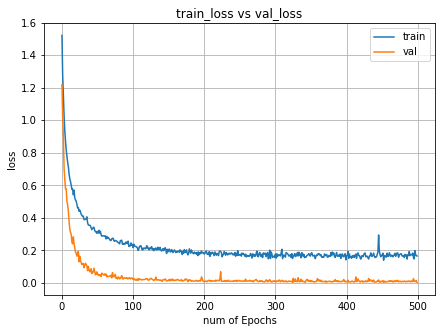

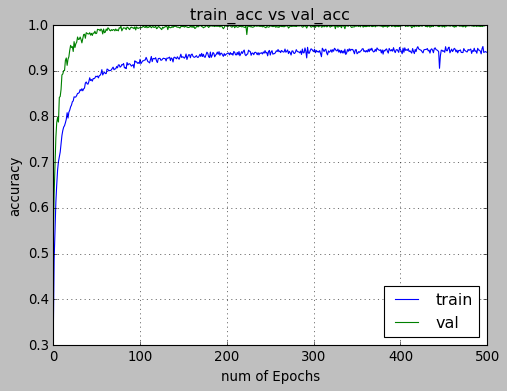

In [10]:
##### visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.savefig('best_figure.jpeg')
plt.show()

In [23]:
# Loading model weights for best epoch , epoch = 108

from keras.models import load_model
loaded_model = load_model('Best-weights-my_model-108-0.1997-0.9292.hdf5')

In [24]:
PATH = os.getcwd()
data_path = PATH + '/test'
data_dir_list = os.listdir(data_path)

img_rows=128
img_cols=128
num_channel=1

num_classes = 5

img_data_list=[]

for dataset in data_dir_list:
    if dataset != '.DS_Store':
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            if img != '.DS_Store':
                input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img)
                input_img_resize=cv2.resize(input_img,(128,128))
                img_data_list.append(input_img_resize)

Loaded the images of dataset-Gucci

Loaded the images of dataset-Celine

Loaded the images of dataset-Hermes

Loaded the images of dataset-Chanel

Loaded the images of dataset-Givenchy



In [25]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(50, 128, 128, 3)


In [26]:
X_test = img_data.copy()

In [27]:
# Define the number of classes
num_classes = 5

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:10]=3
labels[10:20]=0
labels[20:30]=4
labels[30:40]=1
labels[40:50]=2
	  
names = ['Gucci','Celine','Hermes','Chanel','Givenchy']

In [42]:
y_test = np_utils.to_categorical(labels, num_classes)
target_names = ['class 0(Celine)', 'class 1(Chanel)', 'class 2(Givenchy)','class 3(Gucci)','class 4(Hermes)']

In [45]:
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = loaded_model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class ' + str(x) for x in range(17)]

print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00        10
    class 1       1.00      0.90      0.95        10
    class 2       0.83      1.00      0.91        10
    class 3       1.00      1.00      1.00        10
    class 4       1.00      0.90      0.95        10

avg / total       0.97      0.96      0.96        50

[[10  0  0  0  0]
 [ 0  9  1  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 10  0]
 [ 0  0  1  0  9]]


/home/hayatibintehamzah/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 5, does not match size of target_names, 17
  .format(len(labels), len(target_names))


In [33]:
# Printing the confusion matrix


# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10  0  0  0  0]
 [ 0  9  1  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 10  0]
 [ 0  0  1  0  9]]


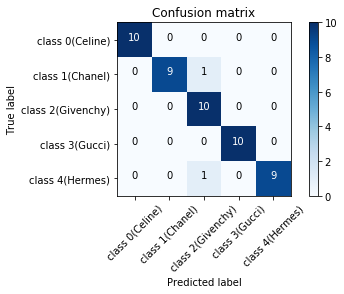

In [40]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.figure()
plt.show()